200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200


ValueError: window is longer than input signal

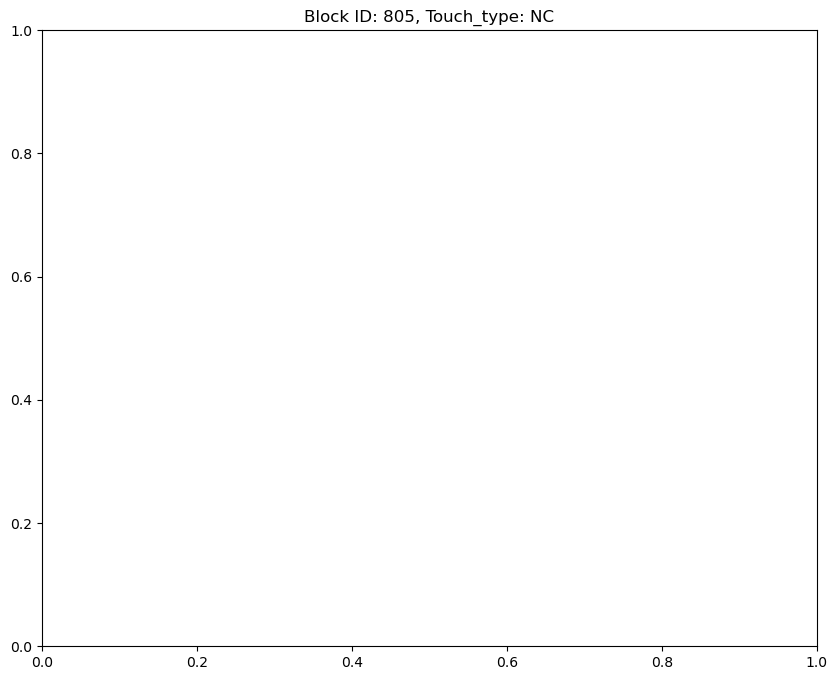

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft
from scipy import signal as sg
import os
file_path = '../DATA/tactile_dataset_block.csv'
data = pd.read_csv(file_path)

output_dir = '../DATA/STFT_images/'

# 删除输出目录及其内容（如果存在），然后重新创建目录
if os.path.exists(output_dir):
    for filename in os.listdir(output_dir):
        file_path = os.path.join(output_dir, filename)
        if os.path.isfile(file_path):
            os.remove(file_path)
    os.rmdir(output_dir)

os.makedirs(output_dir)

# data = pd.read_csv(file_path)

# 排除不感兴趣的列
# columns_of_interest = [col for col in data.columns if col not in ['index', 'time', 'label', 'touch_type', 'block_id']]
joint0_colums = ['e0','de0','tau_J0','tau_ext0']
joint1_colums = ['e1','de1','tau_J1','tau_ext1']
joint2_colums = ['e2','de2','tau_J2','tau_ext2']
joint3_colums = ['e3','de3','tau_J3','tau_ext3']
joint4_colums = ['e4','de4','tau_J4','tau_ext4']
joint5_colums = ['e5','de5','tau_J5','tau_ext5']
joint6_colums = ['e6','de6','tau_J6','tau_ext6']

columns_of_interest = np.hstack((joint0_colums, joint1_colums, joint2_colums, joint3_colums, joint4_colums, joint5_colums, joint6_colums))

# 提取采样率
# time_data = data['time'].values
# fs = 1 / np.mean(np.diff(time_data))  # 计算采样率
fs = 100
## 应该设置成与采样时一致的100Hz

# 创建一个列表，用于记录图像文件名和对应的block_id和touch_type
image_records = []

# 分块绘制
block_ids = data['block_id'].unique()

for block_id in block_ids:
    block_data = data[data['block_id'] == block_id]
    touch_type = block_data['touch_type'].iloc[0]
    
    # 创建一个图形
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.set_title(f'Block ID: {block_id}, Touch_type: {touch_type}')
    
    for col in columns_of_interest:
        signal = block_data[col].values
        
        # 计算STFT
        # nperseg = min(256, len(signal))  # 确保窗口长度不超过信号长度
        nperseg = 64
        # print(len(signal))
        noverlap = nperseg // 2
        # f, t, Zxx = stft(signal, fs, nperseg=nperseg, noverlap=noverlap, window=sg.windows.general_gaussian(64, p=1, sig=7))
        f, t, Zxx = stft(signal, fs, nperseg=nperseg, noverlap=noverlap, window='hamming')
        print(len(abs(Zxx)),"行",len(abs(Zxx)[0]),"列")
        
        # 绘制时频谱图
        cax = ax.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=0.1)
    
    # 添加图例和标签
    ax.set_ylabel('Frequency [Hz]')
    ax.set_xlabel('Time [sec]')
    fig.colorbar(cax, ax=ax, label='Magnitude')
    
    # 保存图像
    image_filename = f'block_{block_id}_touch_{touch_type}.png'
    image_path = os.path.join(output_dir, image_filename)
    plt.savefig(image_path)
    plt.close(fig)
    
    # 记录图像文件名和对应的block_id和touch_type
    image_records.append({'image_filename': image_filename, 'block_id': block_id, 'touch_type': touch_type})

# 保存记录为CSV文件
records_df = pd.DataFrame(image_records)
records_df.to_csv(os.path.join(output_dir, 'image_records.csv'), index=False)

print("STFT图像和记录已成功保存。")